# Discretization of a function of a single variable. Differentiation through finite differences.

## 1 – Code to represent the function and the analytical and numerical derivative.

Consider the function

$$h(x) = \cos\left[\frac{\pi (x-1)}{2}\right] \exp\left[-\left(\frac{x-3}{2.5}\right)^2\right],\tag{1}$$

with $x \in (-4,10) $.

Let us define a sampling of $h$ with 64 intervals, that is, 65 points, and store the
values into double precision arrays called $xx$ and $hh$. Numpy arrays are double precision as 
default. To define $xx$ in Python you can use the commands:

`import numpy as np
nump=65
x0=-4.0 
xf=10.0
xx = np.arange(nump)/(nump-1.0) * (xf-x0) + x0`

Use `matplotlib.pyplot` to visualize hh vs xx. 

Define the variable $nint$ as the number of intervals ($nint= 64$ in the present case)
and $nump$ as the number of points. In IDL, Python and C, those components go
from the $0-$component through the component $nump−1$. Compute the ratio (1) in the [wiki](https://github.com/AST-Course/AST5110/wiki/Discretization) using and filling the function `deriv_dnw` in `nm_lib`. Feel free to use any known library or create your own functions from scratch. 

It will depend on how you created the function that you have $nump$ or $nump−1$ elements. If the former, the last component ($nump-1$) is ill calculated. $hp$ contains a second-order approximation to the derivative of the $hh$ function at the intermediate points $x_{i+1/2}$.

## Tasks:

1. Plot $hh$ versus $xx$ as a solid line with crosses added at each grid point (to visualize the goodness of the discretization) or with `plt.hist` function combined with `plt.plot`. _Make sure the axis pixels are properly located either to the center or half grid shifted_

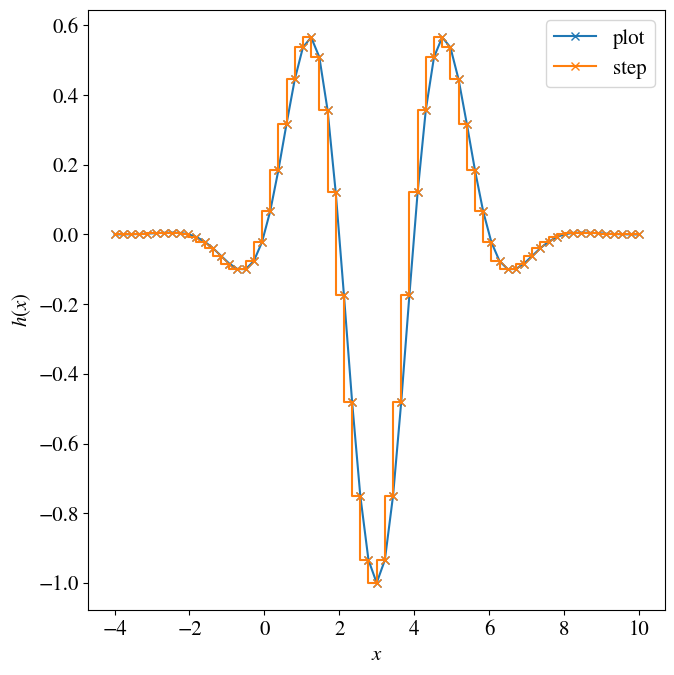

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# Define some simple global matplotlib settings
plt.rcParams.update(
    {"font.size" : "15",
     "font.family"          : "STIXGeneral",
     "mathtext.fontset"     : "stix",
     "figure.autolayout"    : "True",
     "figure.figsize"       : (7,7)
     }
)

_nump = 65
_nint = 64
_x0  = -4.0
_xf  = 10.0

def get_xx(nint: int, xf: float = 10.0, x0: float = -4.0) -> tuple[np.ndarray, float]:
    """
    Generate an array of x values from x0 to xf with nint number of intervals between points

    Arguments:
        nint {int} -- number of intervals between grid points

    Keyword Arguments:
        xf {float} -- last value in output array (default: {10.0})
        x0 {float} -- first value in output array (default: {-4.0})

    Returns:
        tuple[np.ndarray, float] -- (the resulting x array, spacing between points x[1]-x[0])
    """
    x = np.arange(nint+1)/nint * (xf-x0) + x0
    return x, x[1]-x[0]

def get_h(x: np.ndarray) -> np.ndarray:
    """
    Compute the value of test function (eq. 1) along input array x

    Arguments:
        x {np.ndarray} -- coordinate to compute function values along

    Returns:
        np.ndarray -- the resulting function values
    """
    return np.cos(np.pi*(x-1)/2)*np.exp(-((x-3)/2.5)**2)

if __name__ == "__main__":
    xx, dx = get_xx(_nint)
    hh = get_h(xx)

    fig, ax = plt.subplots()
    ax.plot(xx, hh,"-x", label="plot")
    ax.step(xx, hh, "-x", label="step")
    ax.set_xlabel("$x$")
    ax.set_ylabel("$h(x)$")
    ax.legend();

2. Plot the array containing the numerical derivative, $hp$. Calculate analytically the derivative of the function (1) and represent it in the same figure to ascertain the goodness of the approximation for that number of points. __hint__ _make sure the axis pixels are properly located either to the center or half grid shifted_. 

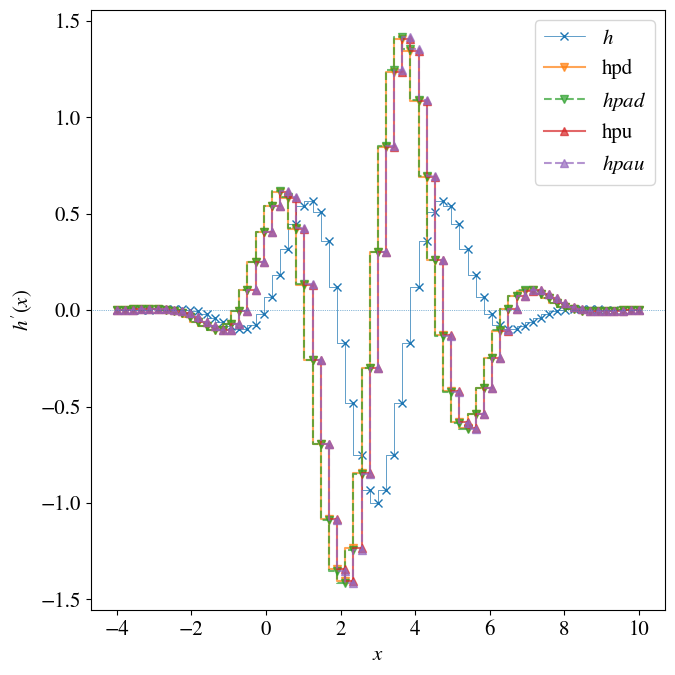

In [2]:
from nm_lib import nm_lib as nm

def get_hp_analytic(x: np.ndarray) -> np.ndarray:
    """
    Computes the analytical first derivative of test function (eq. 1) along input array x

    Arguments:
        x {np.ndarray} -- coordinate to compute the derivative along

    Returns:
        np.ndarray -- the resulting derivative values
    """
    return np.exp(-0.16*(x-3)**2) * (1.5708*np.cos(np.pi*x/2) - (0.32*x-0.96)*np.sin(np.pi*x/2))

if __name__ == "__main__":
    xx, dx = get_xx(_nint)
    hpd = nm.deriv_dnw(xx, hh, method="roll")
    hpu = nm.deriv_upw(xx, hh, method="roll")
    hpad = get_hp_analytic(xx+dx/2)
    hpau = get_hp_analytic(xx-dx/2)
    fig, ax = plt.subplots()
    ax.step(xx,hh, "-x", label="$h$", lw=0.5)
    ax.step(xx,hpd,'-v', label="hpd", alpha=0.7)
    ax.step(xx, hpad,"--v", label="$hpad$", alpha=0.7)    # shift the input array by dx/2 to evaluate same grid points as numerical results
    ax.step(xx,hpu,'-^', label="hpu", alpha=0.7)
    ax.step(xx, hpau,"--^", label="$hpau$", alpha=0.7)    # shift the input array by dx/2 to evaluate same grid points as numerical results
    # ax.step(xx[:-1],hpd,'-x', label="hpd(x)")
    ax.axhline(y=0,ls=":",lw=0.5)   # just mark y=0 to double check location of h(x) max/min values
    ax.legend()
    ax.set_xlabel("$x$")
    ax.set_ylabel("$h'(x)$");

### Comments
Here I've plotted the function $h(x)$ together with the analytical derivative $h_{true}'(x)$ and the numerical approximation of the derivative $hp(x)$. We see that with $nint=64$ the numerical approximation is quite decent. It does not match well at the extreme points (that is when $h(x)$ is close to zero) or at the last grid point where it is ill defined due to the limitations of the method - only applying the simple downwind derivative will exclude the last grid point. The downwind method approximates the derivatives on half integer grid points $x_{i+1/2}$, so to compare it to the analytical results I calculate the analytical derivative on values corresponding to $x_{i+1/2}$. This is also the case in the rest of the tasks where I compare the downwind derivative to the analytical.

## Edit
I've gone back to this to test the `np.roll` implementation of both the upwind and downwind derivatives in `nm_lib`. Using the roll implementation I don't lose the first grid point for downwind, or the last grid point for upwind, which is convenient in many situations. With this plot I can also see that the roll-implementation is correct, by the fact that the analytical results overlap when I adjust the x-values appropriately. For the downwind, I adjust the analytical solution by `x-dx/2`, and for the upwind by `x+dx/2`, . In the rest of these tasks I haven't updated to use the roll implementation, but use my initial implementation of the method using slicing. I now understand that with this slicing method, I've actually implemented the upwind method for both `deriv_dnw` and `deriv_upw` in `nm_lib`, and therefore the analytical calculation is shifted by `x+dx/2`.

## Edit 2
I've now corrected my mistakes, previous edit is actually the opposite of what I should have done. upwind and downwind is now (hopefully) correctly implemented in `nm_lib`, and I've updated the calls in this exercise to reflect that.

# Disclaimer
I actually struggle to understand how to implement the downwind method using slicing, as I always end up with something that works like the upwind method. I'll try to get back to this at some point.

3. Repeat the foregoing, but now using $nint= 32$ and $nint= 16$ intervals to see how the approximation deteriorates. Thereafter, repeat the same process for 128 and 256 intervals, to see how it improves. Consider to use `plt.semilogy` for the error. 

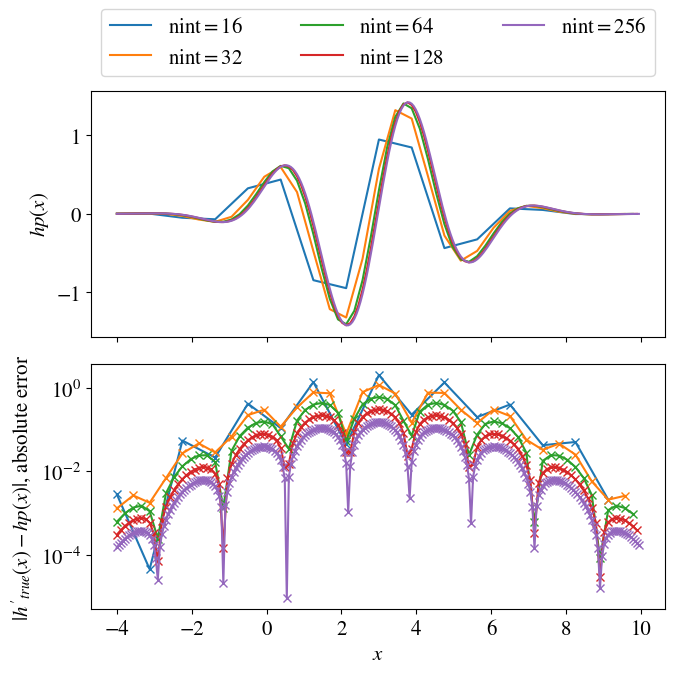

In [3]:
if __name__ == "__main__":
    nints   = np.logspace(4,8,5,dtype=int,base=2)

    fig, ax = plt.subplots(nrows=2, sharex=True)
    for nint in nints:
        xx, dx  = get_xx(nint)
        hp      = nm.deriv_dnw(xx, get_h(xx), method="slice")
        hp_a    = get_hp_analytic(xx - dx/2)    # shift the input array by dx/2 to evaluate same grid points as numerical results
        ax[0].plot(xx[:-1], hp, label=f"nint$={nint}$")
        ax[1].semilogy(xx[:-1], np.abs(hp_a[:-1]-hp),'-x', label=f"nint$={nint}$")
    # ax[0].plot(xx,hp_a, label="Analytical")
    ax[0].legend(bbox_to_anchor=(0., 1.02, 1, .102), loc='lower left', mode="expand", ncol=3)
    ax[1].set_xlabel("$x$")
    ax[0].set_ylabel("$hp(x)$")
    ax[1].set_ylabel("$|h'_{true}(x)-hp(x)|$, absolute error");

### Comments
I create a simple array of values to be used for the number of intervals `nints`, loop over it and compute the analytical and numerical derivatives corresponding to each grid sampling. The absolute error is then simply the difference between the analytical and numerical results, valued on the same grid points $x_{i+1/2}$. In the upper panel I plot the resulting numerical derivatives just to visualize the curves for each case, and in the bottom panel the absolute error is plotted. Here we can see how the error is increased for reduced number of interval bins - and vice versa. Notably, the error is reduced by several orders of magnitude when we go beyond 64 bins, even though the result of the previous task looked "quite decent" for only 64 bins.

As a side note, we can also make out the periodicity of the cosine. As we take the absolute value we get small bumps spaced approximately as $\pi/2$.

## 2- Test of the quadratic order of the approximation.

We are going to test if the ratio $(h_{i+1}-h_i)/(x_{i+1}-x_i)$ approaches the analytical value of the derivative. To that end, we will use samplings with, successively, 16, 32, 64, 128, 256, 512 and 1024 intervals (which are successive powers of 2). Calculate the maximum of the absolute value of the error, meaning: the difference between the analytical and the numerical derivatives at the _same points_. Plot a graph of that value versus the size of the interval in each case using a diagram with logarithmic axes. Check if the curve you get corresponds to a quadratic dependence.

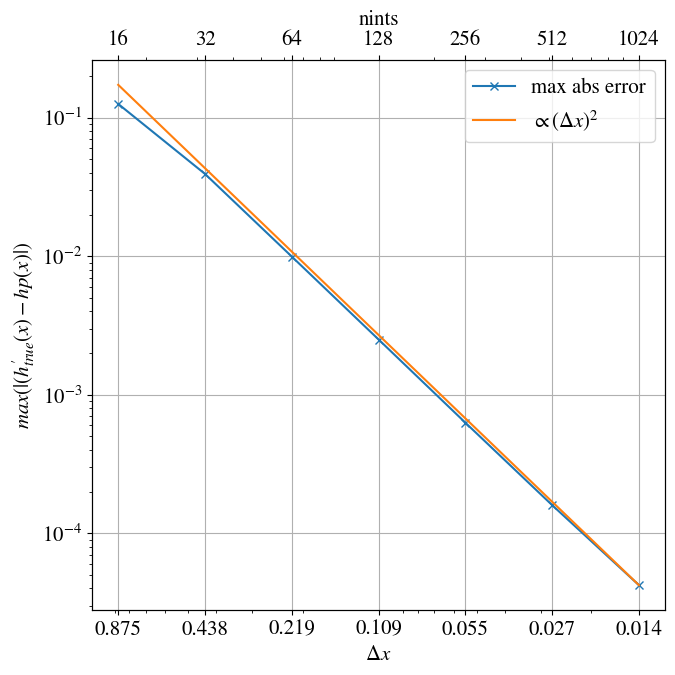

In [4]:
def get_max_abs_err(nints: np.ndarray) -> tuple[np.ndarray, np.ndarray]:
    """
    Calculates the maximum absolute error between the analytical derivative of test function (eq 1) and the numerical downwind derivative of second order
    when calculating with different number of interval bins in the input array given to the test function. The higher number of interval the better the precision,
    up until reaching floating point errors and the max absolute error converges.

    Arguments:
        nints {np.ndarray} -- array of integers for the number of intervals bins to calculate

    Returns:
        tuple[np.ndarray, np.ndarray] -- a tuple of two arrays, 1) the max absolute error, 2) the corresponding interval size in coordingate given to the test function
    """
    dxs = np.zeros(len(nints))
    maxerrs = np.zeros_like(dxs)
    for i, nint in enumerate(nints):
        xx, dxs[i]  = get_xx(nint)
        maxerrs[i]  = np.max(np.abs(get_hp_analytic(xx + dxs[i]/2)[:-1] - nm.deriv_dnw(xx, get_h(xx), method="slice")))
    return maxerrs, dxs

if __name__ == "__main__":
    nints = np.logspace(4,10,7,base=2,dtype=int)
    maxerrs, dxs = get_max_abs_err(nints)

    fig, ax = plt.subplots()
    ax.loglog(dxs, maxerrs, "-x", label="max abs error")
    ax.loglog(dxs, dxs**2/np.min(dxs**2)*np.min(maxerrs), label="$\propto(\Delta x)^2$")
    ax.set_xticks(dxs, [f"{val:.3f}" for val in dxs])
    ax.invert_xaxis()
    ax.legend()
    ax.grid()
    ax.set_xlabel("$\Delta x$")
    ax.set_ylabel("$max(|(h_{true}'(x)-hp(x)|)$")
    secax = ax.twiny()
    secax.loglog(nints, np.zeros_like(nints))
    secax.set_xticks(nints, [f"{val:d}" for val in nints])
    secax.set_xlabel("nints");

### Comments
In this task I perform the same type of calculation as in the previous one, but include higher numbers of intervals as well to see how the numerical derivative approaches the analytical with increasing accuracy. Instead of finding the absolute error across the hole range of values, I pick out the largest error obtained in each sampling and the corresponding bin size for each given sampling, which I've wrapped in a function as I'll use the same method in the next task. I plot the max absolute error against the corresponding bin size, and also include the corresponding number of intervals in the top x-axis for reference. The downwind derivative should be of second order, meaning the error goes as $(\Delta x)^2$. To check this I've simply plotted the curve $(\Delta x)^2$ and scaled it to the results. From this primitiv test i conclude that the error curve follows a quadratic dependence. Keep in mind the $\Delta x$ axis is decreasing in the positiv direction.

## 3- Improving the accuracy of the test of the quadratic order of the approximation.

To test the accuracy of the result of the previous paragraph:

1. extend the test to a larger range of number of intervals (including 2048, 4096, 8192, 16384). Make sure to use double precision variables throughout the program (meaning: all variables except the array indices).

2. then try to fit a straight to the logarithm of the error curves using Python program `numpy.polyfit` and `numpy.poly1d`. From the value of the slope you get from that program, check the accuracy with which you obtain the quadratic dependence.

Min error: 3.332e-06
Fitted polynomial:  
1.645 x - 1.004


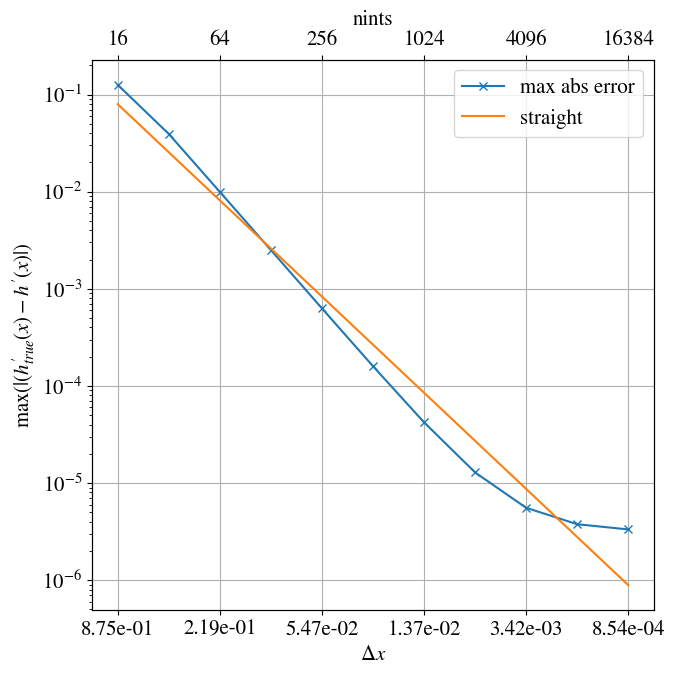

In [5]:
if __name__ == "__main__":
    nint = 11
    nints = np.logspace(4, nint+3, nint, base=2, dtype=int)

    maxerrs, dxs = get_max_abs_err(nints)
    p = np.poly1d(np.polyfit(np.log10(dxs), np.log10(maxerrs), deg=1))

    fig, ax = plt.subplots()
    ax.loglog(dxs, maxerrs, "-x", label="max abs error")
    ax.loglog(dxs, 10**p(np.log10(dxs)), label="straight")
    ax.set_xticks(dxs[::2], [f"{val:.2e}" for val in dxs[::2]])

    ax.invert_xaxis()
    ax.legend()
    ax.grid()
    ax.set_xlabel("$\Delta x$")
    ax.set_ylabel("$\max(|(h_{true}'(x)-h'(x)|)$")
    secax = ax.twiny()
    secax.loglog(nints, np.zeros_like(maxerrs))
    secax.set_xticks(nints[::2], [f"{val:d}" for val in nints[::2]])

    ax.xaxis.set_tick_params(which="minor", bottom=False)
    secax.xaxis.set_tick_params(which="minor", top=False)
    secax.set_xlabel("nints")

    print(f"Min error: {maxerrs[-1]:.3e}")
    print("Fitted polynomial:", p);

### Comments
Here I reuse the function from the last task to compute the max absolute error for even greater number of intervals. At this point I think I might have misunderstood something in either this or the previous task, as I'm basically doing the same thing, but with a more appropriate approach for the fitted straight line (in log-space). 

Either way I think I've understood the take away from these tasks: the error of the downwind derivative goes as $(\Delta x)^2$, until we reach the point where floating point errors prevent the approximation to improve further for $\lim_{\Delta x \rightarrow 0}$. This is the case in the figure above, with more than $1024$ intervals, that is $\Delta x \sim 10^{-2}$, we see the error starts to flatten out to $\sim 3 \cdot 10^{-6}$. From the slope of the straight fit (in log-space!) I find the error following a $(\Delta x)^{1.645}$ dependence from `polyfit` and `poly1d`. This is expected as the straight line also tries to fit the region where the error flattens out, and so the quadratic dependence is disturbed.

To check the slope of the straight against the region with quadratic dependence I have to exclude the last few grid points. I'll simply do this in the code block below. If the coefficient to the first order term approaches $2$ I'm satisfied. To improve the results further I can also exclude the first grid point, as the error actually drops a bit for $16$ intervals.

In [6]:
if __name__ == "__main__":
    p = np.poly1d(np.polyfit(np.log10(dxs[:-4]), np.log10(maxerrs[:-4]), deg=1))
    print("Fitted polynomial with first grid point:", p)
    p = np.poly1d(np.polyfit(np.log10(dxs[1:-4]), np.log10(maxerrs[1:-4]), deg=1))
    print("Fitted polynomial without frist grid point:", p)

Fitted polynomial with first grid point:  
1.946 x - 0.7412
Fitted polynomial without frist grid point:  
1.977 x - 0.6994


## 4- Analytical proof of the order of convergence of the approximation for the derivative (optional)

Consider the sampling used in exercise this, assuming that the spacing between grid points is uniform, i.e., $(\Delta x)_i = \Delta x$. Write a formal Taylor expansion as follows:


$$f(x_{i+1}) = f(x_{i+1/2}) + f'(x_{i+1/2})\frac{\Delta x}{2} + ...  \tag{2}$$

$$f(x_{i}) = f(x_{i+1/2}) - f'(x_{i+1/2})\frac{\Delta x}{2} + ...  \tag{3}$$

including terms up to order $(\Delta x)^3$. Eliminating terms combining those two expressions, conclude that, as said in the previous exercise sheet, the finite-difference approximation to the derivative at the midpoints $x_{i+1/2}$ carried out there is of 2nd order.

### Solution

I start by writing out the Taylor expansions to third order. To simplify the notation, let me denote the subscript of the argument to each function $f$ directly, i.e. $f(x_{i+1}) = f_{i+1}$. The Taylor expansion for $f_{i+1}$ around $x_{i+1/2}$ then becomes

$$ f_{i+1} = f_{i+1/2} + f'_{i+1/2}\frac{\Delta x}{2} + \frac{f''_{i+1/2}}{2!}\left(\frac{\Delta x}{2}\right)^2 + \frac{f'''_{i+1/2}}{3!}\left(\frac{\Delta x}{2}\right)^3$$

For $f_i$, as we evaluate it at x_{i+1/2}, the sign of $\Delta x$ actually changes, but to avoid redefining this I instead consider the signs of each term. This means the sign of the first and third order term changes, but not for the second order term. The expansion therefore becomes

$$ f_{i} = f_{i+1/2} - f'_{i+1/2}\frac{\Delta x}{2} + \frac{f''_{i+1/2}}{2!}\left(\frac{\Delta x}{2}\right)^2 - \frac{f'''_{i+1/2}}{3!}\left(\frac{\Delta x}{2}\right)^3$$

Subtracting these two expressions we see that a lot of the terms will cancel out. And so from the definition of the derivative we therefor have

$$
\begin{align}
    f'_{i} \equiv& \frac{f_{i+1}-f_i}{\Delta x} = \frac{f'_{i+1/2}\Delta x + 1/12 f'''_{i+1/2}(\Delta x)^3}{\Delta x} = f'_{i+1/2} + \frac{1}{12}f'''_{i+1/2}(\Delta x)^2
    \\
    f'_{i} \propto& (\Delta x)^2
\end{align}$$